In [ ]:
 
import urllib.request
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

stories = {
    "pride_and_predjudice": {
        "url": "https://www.gutenberg.org/cache/epub/1342/pg1342.txt",
        "start_word_pos": 6196,
        "end_word_pos": 154559
        }
}

def get_story(story_key):
    return stories[story_key]

def get_word_frequency(words):
    """
    Generates word counts.
    
    Parameters:
    - words (list): List of words to analyze for frequency.
    
    Returns:
    - DataFrame: DataFrame with word counts.
    """
    bow = pd.Series(words).value_counts().reset_index()
    bow.columns = ['word', 'counts']        
    bow = bow.sort_values(by='counts', ascending=False).reset_index(drop=True)
    return bow

def plot_zipf_distribution(words, story):
    """
    Plots the Zipf distribution for the given transcript.
    """        
    # Rank the words by frequency
    words['rank'] = words['counts'].rank(ascending=False, method='average').astype(int)
    
    # Log-transform rank and frequency
    log_rank = np.log10(words['rank'])
    log_freq = np.log10(words['counts'])
    
    # Perform linear regression to calculate the slope
    slope, intercept, r_value, p_value, std_err = linregress(log_rank, log_freq)
    
    # Plot the Zipf distribution (log-log scale)
    plt.figure(figsize=(5, 5))
    plt.loglog(words['rank'], words['counts'], marker=".", linestyle='none', color="grey")
    
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title(f'Zipf Law - {story}')
    plt.legend()
    plt.savefig(f"{story}_zipf_log_space.png")
    plt.show()

['It', 'is', 'a', 'truth', 'universally', 'acknowledged', ',', 'that', 'a', 'single']
['Derbyshire', ',', 'had', 'been', 'the', 'means', 'of', 'uniting', 'them', '.']


/var/folders/02/c1hvrmj11kx0z457p84l6pbc0000gn/T/ipykernel_88927/1365953843.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


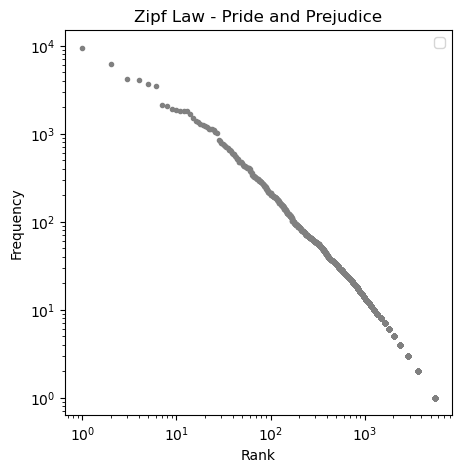

In [182]:
pride_and_prejudice = get_story("pride_and_predjudice")
url = pride_and_prejudice["url"]
word_start = pride_and_prejudice["start_word_pos"]
word_end = pride_and_prejudice["end_word_pos"]

response = urllib.request.urlopen(url)
content = response.read().decode('utf-8')
tokenizer = RegexpTokenizer(r'\w+|[^\w\s]')
words = tokenizer.tokenize(content) 
words = words[word_start:word_end]
# print first 10 words
print(words[:10])
# print last 10 words
print(words[-10:])
word_freq_df = get_word_frequency(words)

plot_zipf_distribution(word_freq_df, "Pride and Prejudice")



In [192]:
labMTdata = pd.read_csv('labMT.csv')
print(labMTdata)

        Rank       Word Word in English  Happiness Score  \
0          0   laughter        laughter             8.50   
1          1  happiness       happiness             8.44   
2          2       love            love             8.42   
3          3      happy           happy             8.30   
4          4    laughed         laughed             8.26   
...      ...        ...             ...              ...   
10217  10217     murder          murder             1.48   
10218  10218  terrorism       terrorism             1.48   
10219  10219       rape            rape             1.44   
10220  10220    suicide         suicide             1.30   
10221  10221  terrorist       terrorist             1.30   

       Standard Deviation of Ratings  
0                             0.9313  
1                             0.9723  
2                             1.1082  
3                             0.9949  
4                             1.1572  
...                              ...  
10217 